In [240]:
#libraries we need for data processing and data analysis 

#import pandas as pd
#import datetime as dt
#import seaborn as sns
#import matplotlib.pyplot as plt
#from scipy.cluster import hierarchy
#from sklearn.cluster import KMeans
#import numpy as np
#import warnings
from sklearn.metrics.pairwise import euclidean_distances

* * * Digital behaviour of Sportify's customers? Uh, that sounds interesting! * * *

In [4]:
#opening the file with a text editor we can see that the separator is ";" and not "," (default value)

df_digital = pd.read_csv("Digital_Contact.csv",sep=";")

In [5]:
#what data do we have?

df_digital.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Cust_ID       4000 non-null   int64  
 1   Email_Clicks  4000 non-null   int64  
 2   SM_Comments   4000 non-null   int64  
 3   App_Clicks    4000 non-null   int64  
 4   SM_Likes      4000 non-null   int64  
 5   SM_Shares     3961 non-null   float64
 6   SM_Clicks     4000 non-null   int64  
dtypes: float64(1), int64(6)
memory usage: 218.9 KB


In [9]:
#what statistics can we take from our current dataset?

df_digital.describe()

,Cust_ID,Email_Clicks,SM_Comments,App_Clicks,SM_Likes,SM_Shares,SM_Clicks
count,4000.000000,4000.00000,4000.000000,4000.000000,4000.000000,3961.000000,4000.000000
mean,3236.534500,25.76225,8.247750,19.526500,26.957000,8.355971,30.349250
std,1878.741877,23.65998,8.064963,34.237945,27.742658,8.696192,32.254974
min,4.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1585.500000,8.00000,1.000000,2.000000,4.000000,1.000000,7.000000
50%,3209.500000,16.00000,4.000000,4.000000,11.000000,2.000000,15.000000
75%,4866.500000,36.00000,15.000000,7.000000,50.000000,16.000000,60.000000
max,6496.000000,86.00000,24.000000,127.000000,88.000000,26.000000,102.000000


In [13]:
#oh-oh we have missing values! however these missing values only appear on "sm_shares"
#in order not to throw away information regarding the other variables, let's avoid delete these rows, and instead replace missing values with the mean


df_digital.fillna(df_digital.mean(),inplace=True)

In [14]:
df_digital.describe()

#yey! we now have no missing values

,Cust_ID,Email_Clicks,SM_Comments,App_Clicks,SM_Likes,SM_Shares,SM_Clicks
count,4000.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,3236.534500,25.76225,8.247750,19.526500,26.957000,8.355971,30.349250
std,1878.741877,23.65998,8.064963,34.237945,27.742658,8.653684,32.254974
min,4.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1585.500000,8.00000,1.000000,2.000000,4.000000,1.000000,7.000000
50%,3209.500000,16.00000,4.000000,4.000000,11.000000,2.000000,15.000000
75%,4866.500000,36.00000,15.000000,7.000000,50.000000,16.000000,60.000000
max,6496.000000,86.00000,24.000000,127.000000,88.000000,26.000000,102.000000


In [16]:
#so let's convert "sm_shares" into datatype int

df_digital = df_digital.astype(int)

In [17]:
df_digital.info()

#yep, we did it! 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Cust_ID       4000 non-null   int64
 1   Email_Clicks  4000 non-null   int64
 2   SM_Comments   4000 non-null   int64
 3   App_Clicks    4000 non-null   int64
 4   SM_Likes      4000 non-null   int64
 5   SM_Shares     4000 non-null   int64
 6   SM_Clicks     4000 non-null   int64
dtypes: int64(7)
memory usage: 218.9 KB


In [21]:
#let's look at our dataset 
print(df_digital.to_string())

      Cust_ID  Email_Clicks  SM_Comments  App_Clicks  SM_Likes  SM_Shares  SM_Clicks
0           4            72            1           7         7          1         73
1           5            15           20           1        35         15         16
2           6             9            7           3        73         19         10
3           9            67            0           2         0          1        101
4          10            38            0           1         9          0         56
5          11            66            1           4         7          1         93
6          12            12            7           3        31         14          8
7          15            60            2           5         1          2         57
8          18             5           12           1        38         26         12
9          19            11           12           2        81         14         18
10         20            66            2           5         1   

In [28]:
#do we have duplicates?

if df_digital.duplicated().any():
    print('There are duplicates!')
else:
    print('No duplicates found')

No duplicates found


* * * Let's now turn to the Products dataset * * *

In [30]:
df_products = pd.read_excel("Products.xlsx")

In [31]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Cust_ID            4000 non-null   int64         
 1   Fitness&Gym        4000 non-null   int64         
 2   Hiking&Running     4000 non-null   int64         
 3   Last_Purchase      4000 non-null   datetime64[ns]
 4   TeamGames          4000 non-null   int64         
 5   OutdoorActivities  4000 non-null   int64         
 6   TotalProducts      4000 non-null   int64         
dtypes: datetime64[ns](1), int64(6)
memory usage: 218.9 KB


In [34]:
print(df_products.to_string())

      Cust_ID  Fitness&Gym  Hiking&Running Last_Purchase  TeamGames  OutdoorActivities  TotalProducts
0           4            0              76    2024-02-19        248                 37              6
1           5            0              75    2024-02-17        248                 37              6
2           6            6              69    2024-02-15        215                 34              5
3           9           36              71    2024-02-13        248                 35              8
4          10            8              97    2024-02-15        204                 34              5
5          11           36              71    2024-02-13        248                 35              8
6          12            0              89    2024-02-14        167                 37              5
7          15           19             170    2024-01-10        266                 33              9
8          18            8              86    2024-02-24        239               

In [32]:
df_products.describe()

,Cust_ID,Fitness&Gym,Hiking&Running,Last_Purchase,TeamGames,OutdoorActivities,TotalProducts
count,4000.000000,4000.000000,4000.000000,4000,4000.000000,4000.000000,4000.000000
mean,3236.534500,32.020250,55.844750,2024-01-30 18:50:02.399999744,176.085000,33.602750,5.329500
min,4.000000,0.000000,9.000000,2023-10-15 00:00:00,0.000000,28.000000,2.000000
25%,1585.500000,25.000000,38.000000,2024-01-20 00:00:00,121.000000,32.000000,4.000000
50%,3209.500000,31.000000,47.000000,2024-02-01 00:00:00,180.000000,33.000000,5.000000
75%,4866.500000,40.000000,66.000000,2024-02-13 00:00:00,230.000000,35.000000,6.000000
max,6496.000000,123.000000,464.000000,2024-02-29 00:00:00,1203.000000,42.000000,20.000000
std,1878.741877,14.469284,33.119109,NaN,69.964738,1.711483,1.515257


In [33]:
#any duplicates around here?

if df_products.duplicated().any():
    print('There are duplicates!')
else:
    print('No duplicates found')

No duplicates found


In [42]:
#what was the total money spent per customer?

df_products['TotalSpent'] = df_products[['Fitness&Gym', 'Hiking&Running', 'TeamGames', 'OutdoorActivities']].sum(axis=1)


In [44]:
df_products.head(10)

,Cust_ID,Fitness&Gym,Hiking&Running,Last_Purchase,TeamGames,OutdoorActivities,TotalProducts,TotalSpent
0,4,0,76,2024-02-19,248,37,6,361
1,5,0,75,2024-02-17,248,37,6,360
2,6,6,69,2024-02-15,215,34,5,324
3,9,36,71,2024-02-13,248,35,8,390
4,10,8,97,2024-02-15,204,34,5,343
5,11,36,71,2024-02-13,248,35,8,390
6,12,0,89,2024-02-14,167,37,5,293
7,15,19,170,2024-01-10,266,33,9,488
8,18,8,86,2024-02-24,239,35,5,368
9,19,51,341,2024-02-13,227,32,11,651


In [76]:
#it can be useful for analysis to have a column only for year

df_products['YearLastPurchase'] = df_products['Last_Purchase'].dt.year

In [77]:
df_products.head(10)

,Cust_ID,Fitness&Gym,Hiking&Running,Last_Purchase,TeamGames,OutdoorActivities,TotalProducts,TotalSpent,YearLastPurchase,MonthLastPurchase
0,4,0,76,2024-02-19,248,37,6,361,2024,2
1,5,0,75,2024-02-17,248,37,6,360,2024,2
2,6,6,69,2024-02-15,215,34,5,324,2024,2
3,9,36,71,2024-02-13,248,35,8,390,2024,2
4,10,8,97,2024-02-15,204,34,5,343,2024,2
5,11,36,71,2024-02-13,248,35,8,390,2024,2
6,12,0,89,2024-02-14,167,37,5,293,2024,2
7,15,19,170,2024-01-10,266,33,9,488,2024,1
8,18,8,86,2024-02-24,239,35,5,368,2024,2
9,19,51,341,2024-02-13,227,32,11,651,2024,2


In [47]:
#it can also be of use to have a column for month

df_products['MonthLastPurchase'] = df_products['Last_Purchase'].dt.month

In [48]:
df_products.head(10)

,Cust_ID,Fitness&Gym,Hiking&Running,Last_Purchase,TeamGames,OutdoorActivities,TotalProducts,TotalSpent,YearLastPurchase,MonthLastPurchase
0,4,0,76,2024-02-19,248,37,6,361,2024,2
1,5,0,75,2024-02-17,248,37,6,360,2024,2
2,6,6,69,2024-02-15,215,34,5,324,2024,2
3,9,36,71,2024-02-13,248,35,8,390,2024,2
4,10,8,97,2024-02-15,204,34,5,343,2024,2
5,11,36,71,2024-02-13,248,35,8,390,2024,2
6,12,0,89,2024-02-14,167,37,5,293,2024,2
7,15,19,170,2024-01-10,266,33,9,488,2024,1
8,18,8,86,2024-02-24,239,35,5,368,2024,2
9,19,51,341,2024-02-13,227,32,11,651,2024,2


* * * Let's call Demographics to the party! * * *

In [51]:
df_demog = pd.read_csv("Demographic.txt",sep='\t')

In [52]:
df_demog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Cust_ID          4000 non-null   int64 
 1   name             4000 non-null   object
 2   birth_year       4000 non-null   int64 
 3   education_level  4000 non-null   object
 4   dependents       4000 non-null   int64 
 5   City             2019 non-null   object
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


In [53]:
uniquecityvalues = df_demog['City'].unique()
print(uniquecityvalues)

[nan 'Birmingham' 'Brimingham' 'London']


In [55]:
value_counts_city = df_demog['City'].value_counts()
print(value_counts_city)

City
Birmingham    1284
London         700
Brimingham      35
Name: count, dtype: int64


In [56]:
df_demog['City'].replace('Brimingham','Birmingham',inplace=True)

In [94]:
df_demog['City'].value_counts()

City
Birmingham    1319
London         700
Name: count, dtype: int64

In [58]:
df_demog.describe()

,Cust_ID,birth_year,dependents
count,4000.000000,4000.000000,4000.000000
mean,3236.534500,1989.299000,0.298000
std,1878.741877,16.398836,0.498757
min,4.000000,1944.000000,0.000000
25%,1585.500000,1980.000000,0.000000
50%,3209.500000,1997.000000,0.000000
75%,4866.500000,2002.000000,1.000000
max,6496.000000,2006.000000,2.000000


In [60]:
df_demog.describe(include='object')

,name,education_level,City
count,4000,4000,2019
unique,3892,7,2
top,Mr Michael Jackson,high school,Birmingham
freq,4,1280,1319


In [62]:
search = df_demog['name'].str.contains('Mr Michael Jackson')
rows_containing_string = df_demog[search]
print(rows_containing_string)

      Cust_ID                name  birth_year        education_level  \
825      1300  Mr Michael Jackson        1998  less than high school   
1416     2305  Mr Michael Jackson        2003  less than high school   
2780     4518  Mr Michael Jackson        2004  less than high school   
3604     5833  Mr Michael Jackson        1965               Bachelor   

      dependents        City  
825            0         NaN  
1416           0  Birmingham  
2780           1      London  
3604           0  Birmingham  


In [92]:
df_demog['education_level'].unique()

array(['Master', 'High School', 'PhD', 'less than high school',
       'Bachelor'], dtype=object)

In [69]:
df_demog['education_level'].replace('high school','High School',inplace=True)
df_demog['education_level'].replace('PHD','PhD',inplace=True)

In [91]:
df_demog['education_level'].unique()

array(['Master', 'High School', 'PhD', 'less than high school',
       'Bachelor'], dtype=object)

In [63]:
df_demog.head(10)

,Cust_ID,name,birth_year,education_level,dependents,City
0,4,Mr Daniel Spencer,2002,Master,1,NaN
1,5,Miss Abigail Garcia,1994,high school,0,Birmingham
2,6,Miss Laura Williams,2005,PhD,1,NaN
3,9,Mr Justin Hamilton,2003,high school,0,NaN
4,10,Mr Steven Vaughn,2002,less than high school,0,NaN
5,11,Mr Arthur Drake,2000,high school,1,Birmingham
6,12,Miss Sandra Larson,2005,PhD,0,NaN
7,15,Miss Alexandria King,1958,less than high school,0,London
8,18,Miss Megan Henry,1996,high school,1,NaN
9,19,Miss Patricia Carlson,1999,Master,0,NaN


In [64]:
df_demog.loc[df_demog['dependents']>1,'dependents']=1

In [66]:
df_demog['dependents'].describe()

count    4000.000000
mean        0.278250
std         0.448193
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: dependents, dtype: float64

In [71]:
df_demog['gender'] = ''
df_demog.loc[df_demog['name'].str.contains('Miss'),'gender'] = 'Female'
df_demog.loc[df_demog['name'].str.contains('Mr'),'gender'] = 'Male'

In [72]:
df_demog['gender'].info()

#no missing values - nice!

<class 'pandas.core.series.Series'>
RangeIndex: 4000 entries, 0 to 3999
Series name: gender
Non-Null Count  Dtype 
--------------  ----- 
4000 non-null   object
dtypes: object(1)
memory usage: 31.4+ KB


In [73]:
df_demog['gender'].describe()

count       4000
unique         2
top       Female
freq        2368
Name: gender, dtype: object

In [74]:
df_demog.head(10)

,Cust_ID,name,birth_year,education_level,dependents,City,gender
0,4,Mr Daniel Spencer,2002,Master,1,NaN,Male
1,5,Miss Abigail Garcia,1994,High School,0,Birmingham,Female
2,6,Miss Laura Williams,2005,PhD,1,NaN,Female
3,9,Mr Justin Hamilton,2003,High School,0,NaN,Male
4,10,Mr Steven Vaughn,2002,less than high school,0,NaN,Male
5,11,Mr Arthur Drake,2000,High School,1,Birmingham,Male
6,12,Miss Sandra Larson,2005,PhD,0,NaN,Female
7,15,Miss Alexandria King,1958,less than high school,0,London,Female
8,18,Miss Megan Henry,1996,High School,1,NaN,Female
9,19,Miss Patricia Carlson,1999,Master,0,NaN,Female


In [79]:
CurrentYear = dt.datetime.now().year

df_demog['age'] = CurrentYear - df_demog['birth_year']

In [80]:
df_demog.head(10)

,Cust_ID,name,birth_year,education_level,dependents,City,gender,age
0,4,Mr Daniel Spencer,2002,Master,1,NaN,Male,22
1,5,Miss Abigail Garcia,1994,High School,0,Birmingham,Female,30
2,6,Miss Laura Williams,2005,PhD,1,NaN,Female,19
3,9,Mr Justin Hamilton,2003,High School,0,NaN,Male,21
4,10,Mr Steven Vaughn,2002,less than high school,0,NaN,Male,22
5,11,Mr Arthur Drake,2000,High School,1,Birmingham,Male,24
6,12,Miss Sandra Larson,2005,PhD,0,NaN,Female,19
7,15,Miss Alexandria King,1958,less than high school,0,London,Female,66
8,18,Miss Megan Henry,1996,High School,1,NaN,Female,28
9,19,Miss Patricia Carlson,1999,Master,0,NaN,Female,25


In [96]:
df_demog['surname'] = df_demog['name'].str.split().str[-1]

In [97]:
df_demog.head()

,name,birth_year,education_level,dependents,City,gender,age,surname
Cust_ID,,,,,,,,
4,Mr Daniel Spencer,2002,Master,1,NaN,Male,22,Spencer
5,Miss Abigail Garcia,1994,High School,0,Birmingham,Female,30,Garcia
6,Miss Laura Williams,2005,PhD,1,NaN,Female,19,Williams
9,Mr Justin Hamilton,2003,High School,0,NaN,Male,21,Hamilton
10,Mr Steven Vaughn,2002,less than high school,0,NaN,Male,22,Vaughn


In [99]:
df_demog['surname'].value_counts()

surname
Smith        94
Johnson      63
Williams     58
Brown        52
Miller       52
             ..
Blake         1
Kirk          1
Shah          1
Velazquez     1
Hanna         1
Name: count, Length: 865, dtype: int64

* * * Now let's join datasets! * * *

In [141]:
df_digital.set_index('Cust_ID',inplace=True)
df_products.set_index('Cust_ID',inplace=True)
df_demog.set_index('Cust_ID',inplace=True)

KeyError: "None of ['Cust_ID'] are in the columns"

In [98]:
#df_digital.head()
#df_products.head()
df_demog.head()

,name,birth_year,education_level,dependents,City,gender,age,surname
Cust_ID,,,,,,,,
4,Mr Daniel Spencer,2002,Master,1,NaN,Male,22,Spencer
5,Miss Abigail Garcia,1994,High School,0,Birmingham,Female,30,Garcia
6,Miss Laura Williams,2005,PhD,1,NaN,Female,19,Williams
9,Mr Justin Hamilton,2003,High School,0,NaN,Male,21,Hamilton
10,Mr Steven Vaughn,2002,less than high school,0,NaN,Male,22,Vaughn


In [142]:
df_merged = pd.concat([df_digital,df_products,df_demog],axis=1,join="inner")

In [176]:
df_merged['City'].fillna('Missing',inplace=True)

In [177]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Email_Clicks       4000 non-null   int64         
 1   SM_Comments        4000 non-null   int64         
 2   App_Clicks         4000 non-null   int64         
 3   SM_Likes           4000 non-null   int64         
 4   SM_Shares          4000 non-null   int64         
 5   SM_Clicks          4000 non-null   int64         
 6   Fitness&Gym        4000 non-null   int64         
 7   Hiking&Running     4000 non-null   int64         
 8   Last_Purchase      4000 non-null   datetime64[ns]
 9   TeamGames          4000 non-null   int64         
 10  OutdoorActivities  4000 non-null   int64         
 11  TotalProducts      4000 non-null   int64         
 12  TotalSpent         4000 non-null   int64         
 13  YearLastPurchase   4000 non-null   int32         
 14  MonthLas

In [165]:
df_merged.rename(columns={'name':'Name','birth_year':'BirthYear','education_level':'EducationLevel','dependents':'Dependents','gender':'Gender','age':'Age','surname':'Surname'},inplace=True)
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Email_Clicks       4000 non-null   int64         
 1   SM_Comments        4000 non-null   int64         
 2   App_Clicks         4000 non-null   int64         
 3   SM_Likes           4000 non-null   int64         
 4   SM_Shares          4000 non-null   int64         
 5   SM_Clicks          4000 non-null   int64         
 6   Fitness&Gym        4000 non-null   int64         
 7   Hiking&Running     4000 non-null   int64         
 8   Last_Purchase      4000 non-null   datetime64[ns]
 9   TeamGames          4000 non-null   int64         
 10  OutdoorActivities  4000 non-null   int64         
 11  TotalProducts      4000 non-null   int64         
 12  TotalSpent         4000 non-null   int64         
 13  YearLastPurchase   4000 non-null   int32         
 14  MonthLas

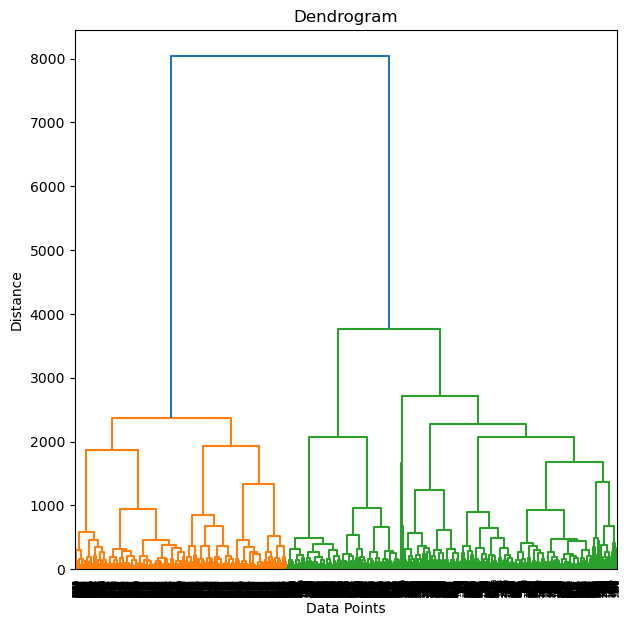

In [186]:
#select only numerical columns
df_numeric = df_merged.select_dtypes(include=['float64','int64'])

#create clusters using Ward method
clusters = hierarchy.linkage(df_numeric,method="ward")

#create dendrogram
plt.figure(figsize=(7,7))
dendrogram = hierarchy.dendrogram(clusters)
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

In [253]:
#k-means
x = np.random.rand(100,2)
kmeans = KMeans(n_clusters=2,random_state=0)
kmeans.fit(x)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

print("Centroids:\n",centroids)
print("Labels:\n",labels)

Centroids:
 [[0.57359487 0.72637427]
 [0.3734873  0.26229788]]
Labels:
 [0 0 0 1 1 1 0 0 1 1 0 0 1 1 1 0 1 1 1 0 1 0 1 1 1 0 0 1 0 1 1 0 0 1 0 0 0
 1 1 0 1 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 1 0 1 0 0 0 1 1 0 1 0 0 0
 1 0 1 0 1 1 1 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 1]


In [200]:
#ignore future warnings
warnings.filterwarnings("ignore",category=FutureWarning)

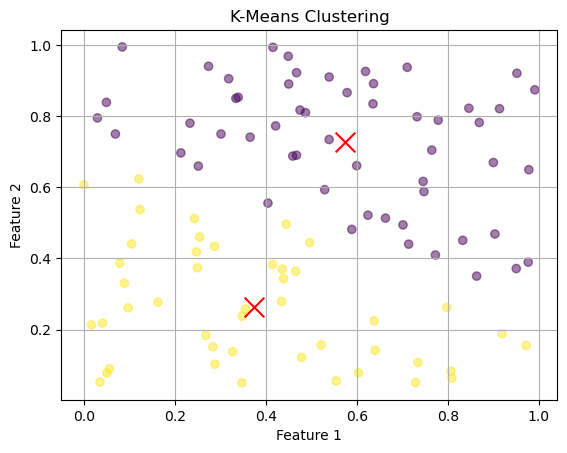

In [254]:
plt.scatter(x[:,0],x[:,1],c=kmeans.labels_,cmap='viridis',alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker='x', s=200, color='red')

plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()

In [247]:
df_numeric = df_merged.select_dtypes(include=['float64','int64'])

In [248]:
model=KMeans(n_clusters=2,random_state=100).fit(df_numeric)

In [249]:
df_numeric['label'] = model.labels_

In [250]:
des = df_numeric.groupby(['label']).describe().transpose()
des

label                         0            1
Email_Clicks count  1929.000000  2071.000000
             mean     26.011405    25.530179
             std      23.876821    23.459595
             min       0.000000     0.000000
             25%       8.000000     8.000000
...                         ...          ...
Age          min      18.000000    18.000000
             25%      22.000000    23.000000
             50%      27.000000    28.000000
             75%      44.000000    45.000000
             max      80.000000    80.000000

[120 rows x 2 columns]

In [251]:
cluster0 = df_numeric[df_numeric.label==0]
cluster1 = df_numeric[df_numeric.label==1]

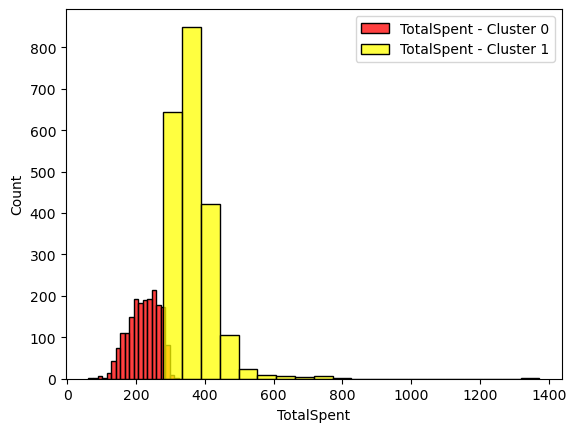

In [252]:
sns.histplot(cluster0['TotalSpent'],color='red',label='TotalSpent - Cluster 0',bins=20)
sns.histplot(cluster1['TotalSpent'],color='yellow',label='TotalSpent - Cluster 1',bins=20)
plt.legend()